In [10]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the data
data = pd.read_csv("Data/data.csv")

# Select numerical columns for clustering
X_song = data.select_dtypes(np.number)

# Define a range for clusters
K = range(1, 35)

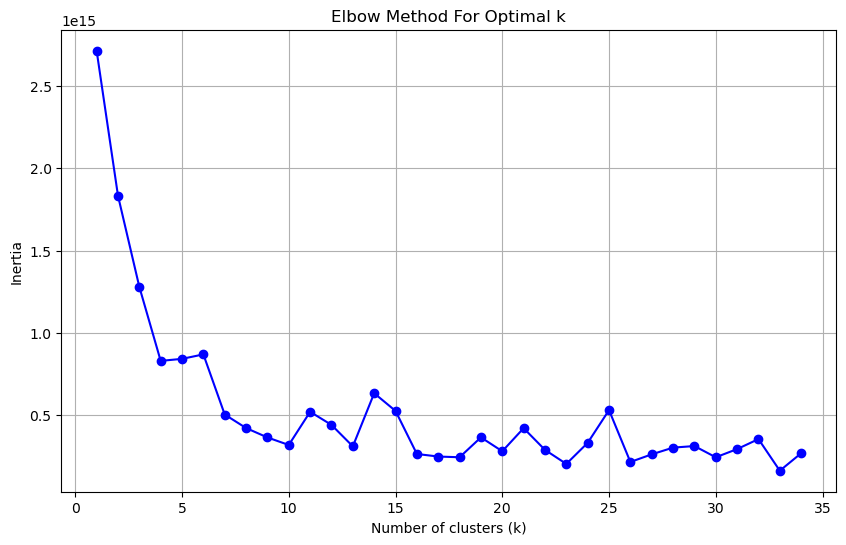

In [11]:
# Elbow Method (using MiniBatchKMeans for efficiency)
inertia = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, n_init=10, random_state=42)  # Adjust batch_size and n_init
    kmeans.fit(X_song)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

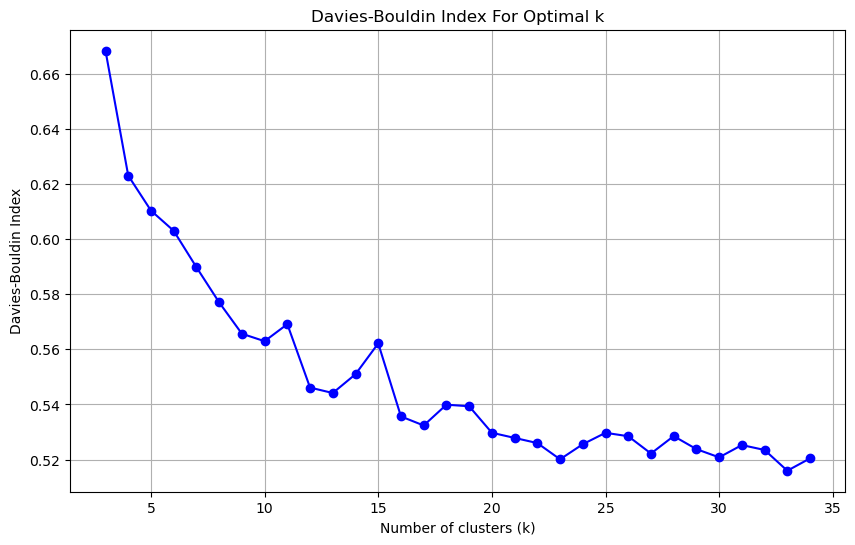

In [12]:
# Davies-Bouldin Index (using MiniBatchKMeans for efficiency)
db_scores = []
for k in K[2:]:  # Start from 3 to have at least two clusters for comparison
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, n_init=10, random_state=42)  # Adjust batch_size
    kmeans.fit(X_song)
    db_scores.append(davies_bouldin_score(X_song, kmeans.labels_))

# Plot Davies-Bouldin Index scores
plt.figure(figsize=(10, 6))
plt.plot(K[2:], db_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index For Optimal k')
plt.grid()
plt.show()

In [6]:
# Silhouette Score (using MiniBatchKMeans for efficiency)
sil_scores = []
for k in K[1:]:  # Start from 2 to avoid silhouette score error
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, n_init=10, random_state=42)  # Adjust batch_size
    kmeans.fit(X_song)
    sil_scores.append(silhouette_score(X_song, kmeans.labels_))

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], sil_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid()
plt.show()


KeyboardInterrupt: 